### WeatherPy

### Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the citipy Library 

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


### Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude 

### Use the OpenWeatherMap API to retrievve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" #lat={lat}&lon={lon}&appid={API key}
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "q=" + city + "&appid=" + weather_api_key + "&units=" + units

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ondjiva
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | bin yauri
Processing Record 5 of Set 1 | utrik
Processing Record 6 of Set 1 | pangai
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 12 of Set 1 | colonia
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | solnechnyy
Processing Record 17 of Set 1 | nicoya
Processing Record 18 of Set 1 | afif
Processing Record 19 of Set 1 | oranjemund
Processing Record 20 of Set 1 | comodoro rivadavia
Processing Record 21 of Set 1 | jamestown
Processing

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          129
Lat           129
Lng           129
Max Temp      129
Humidity      129
Cloudiness    129
Wind Speed    129
Country       129
Date          129
dtype: int64

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ondjiva,-17.0667,15.7333,22.76,64,87,4.59,AO,1738600898
1,grytviken,-54.2811,-36.5092,5.87,95,100,2.18,GS,1738600900
2,adamstown,-25.0660,-130.1015,24.37,76,97,6.74,PN,1738600791
3,bin yauri,10.7823,4.8114,36.54,10,78,1.11,NG,1738600902
4,utrik,11.2278,169.8474,26.42,67,39,10.37,MH,1738600903


In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ondjiva,-17.0667,15.7333,22.76,64,87,4.59,AO,1738600898
1,grytviken,-54.2811,-36.5092,5.87,95,100,2.18,GS,1738600900
2,adamstown,-25.0660,-130.1015,24.37,76,97,6.74,PN,1738600791
3,bin yauri,10.7823,4.8114,36.54,10,78,1.11,NG,1738600902
4,utrik,11.2278,169.8474,26.42,67,39,10.37,MH,1738600903


### Create the Scatter Plots Requested

### Latitude Vs. Temperature

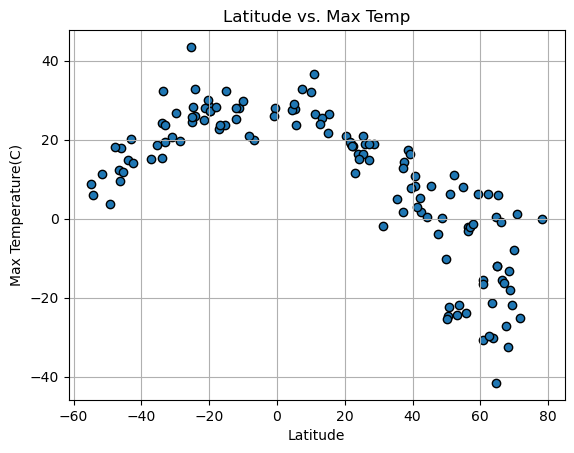

In [46]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolors='black')


# Incorporate the other graph properties
plt.title("Latitude vs. Max Temp")
plt.ylabel("Max Temperature(C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude Vs Humidity 

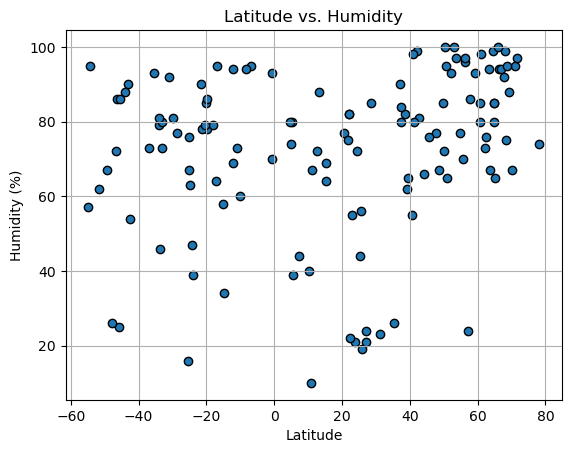

In [48]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

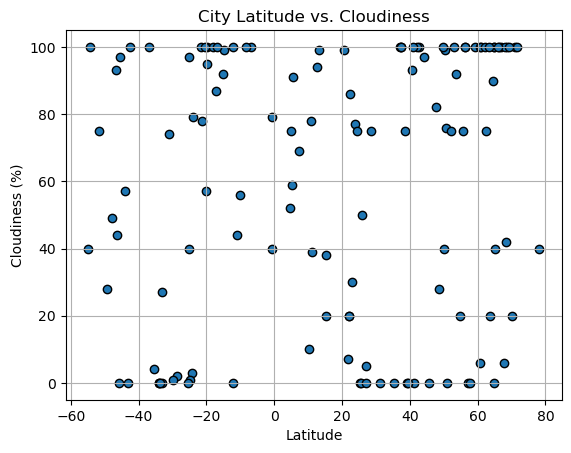

In [50]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolors='black')
plt.title("Latitude vs. Cloudiness")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude Vs. Wind Speed Plot

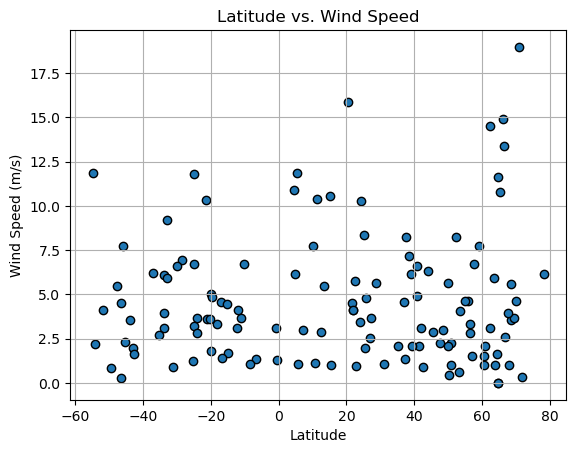

In [53]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

### Requirement 2: Compute Linear Regression for Each Relationship

In [60]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x,y):
    slope, intercept, r, p, std_err = linregress(x,y)
    
    y_axis = list(map((lambda x_valus: slope * x_valus + intercept), x))

    plt.plot(x, y_axis, color= 'blue')

    equation = f"y={slope:.2f}x + {intercept:.2f}"
    plt.text(min(x),min(y), equation, fontsize= 15, color='blue', verticalalignment='top')

    print(f'The r^2 value is: {np.square(r)}')

In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,bin yauri,10.7823,4.8114,36.54,10,78,1.11,NG,1738600902
4,utrik,11.2278,169.8474,26.42,67,39,10.37,MH,1738600903
6,albany,42.6001,-73.9662,1.55,81,100,0.89,US,1738600700
7,thompson,55.7435,-97.8558,-23.91,70,75,4.63,CA,1738600679
10,colonia,50.9333,6.9500,6.09,65,0,1.03,DE,1738600669


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ondjiva,-17.0667,15.7333,22.76,64,87,4.59,AO,1738600898
1,grytviken,-54.2811,-36.5092,5.87,95,100,2.18,GS,1738600900
2,adamstown,-25.0660,-130.1015,24.37,76,97,6.74,PN,1738600791
5,pangai,-19.8000,-174.3500,27.17,78,100,5.03,TO,1738600639
8,edinburgh of the seven seas,-37.0676,-12.3116,15.19,73,100,6.20,SH,1738600908


### Temperature Vs. Latitude Linear Regression Plot

The r^2 value is: 0.6874254667590999


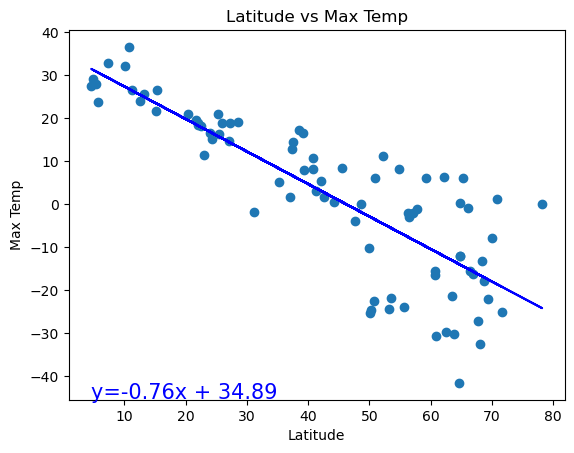

In [67]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

#call the linear regression plot function
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.title("Latitude vs Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

plt.show()

The r^2 value is: 0.5041861361106615


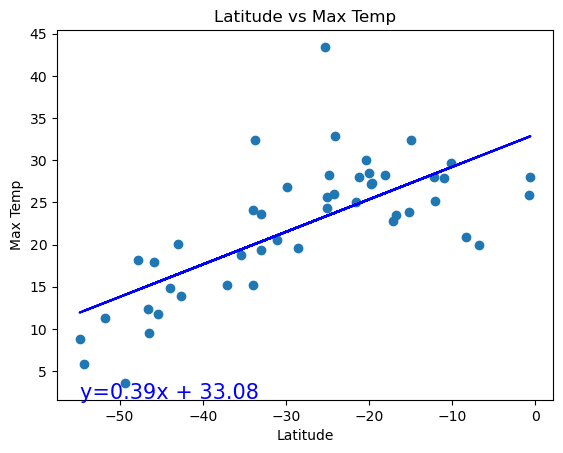

In [69]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

#call the linear regression plot function
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.title("Latitude vs Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

plt.show()

### Summary Discussion about the linear relationships below:

This graph shows a positive trend meaning as the temperature increases, the latitute also increases. 

### Humidity Vs. Latitude Linear Regression Plot

The r^2 value is: 0.25177110768902267


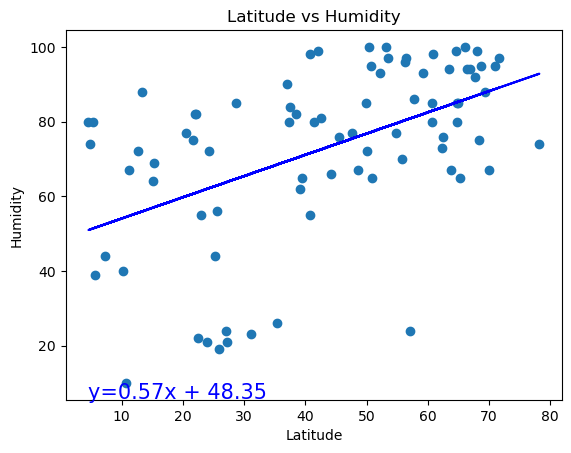

In [73]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

#call the linear regression plot function
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.show()

The r^2 value is: 0.024014828755541135


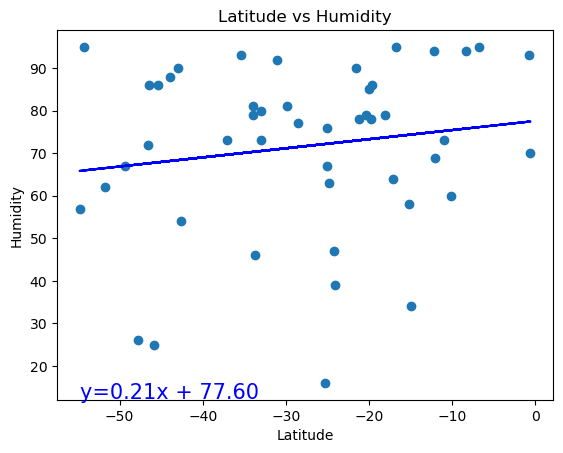

In [75]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

#call the linear regression plot function
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.show()

### Discussion about the Linear Relationship Below

Although a trend line is created, there is no correlation between Latitude and Humidty from the set of data displayed. 


### Cloudiiness Vs. Latitude Linear Regression Plot

The r^2 value is: 0.036828575169078184


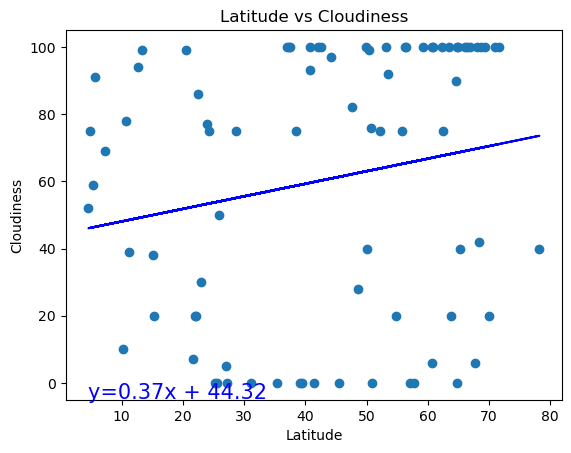

In [82]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

#call the linear regression plot function
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.show()

The r^2 value is: 0.04934490129371719


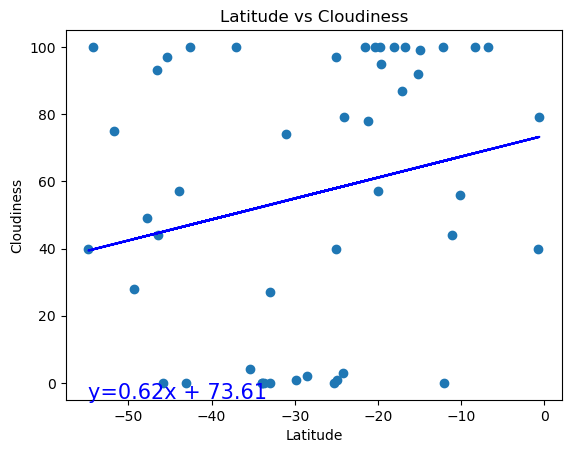

In [84]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

#call the linear regression plot function
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.show()

### Discussion about the Linear Relationships below

Although a trend line is created, there is no correlation between Latitude and Humidty from the set of data displayed. 


### Wind Speed Vs. Latitude Linear Regression Plot

The r^2 value is: 0.0028427303469259224


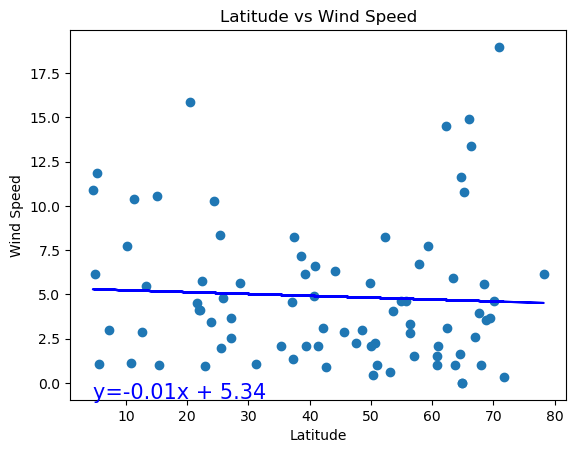

In [89]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

#call the linear regression plot function
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.show()

The r^2 value is: 0.021229458886222942


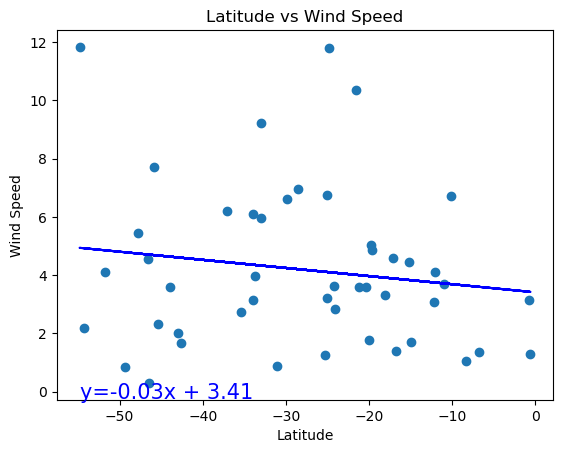

In [91]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

#call the linear regression plot function
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.show()

### Discussion about the Linear Relationships Below

The majority of the points have a wind speed of 6 and below. 